<a href="https://colab.research.google.com/github/jayeshraj619/AI-LAB/blob/master/fLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping
df=pd.read_csv('/content/finalspi1.csv',)
print('Number of rows and columns:', df.shape)
df.head(5)

Number of rows and columns: (419, 6)


,Date,spi1,spi1(t=1),spi1(t=2),Avg.hum(t=1),temp vs (spi1(t))
0,01-01-1979,-1.2898,0.8088,-1.0197,0.6723,24.7943
1,01-02-1979,-0.9092,-1.2898,0.8088,0.6324,26.0610
2,01-03-1979,-1.7148,-0.9092,-1.2898,0.6803,27.6508
3,01-01-1979,-0.8898,-1.7148,-0.9092,0.7497,28.6554
4,01-05-1979,0.8898,-0.8898,-1.7148,0.8563,27.1441


In [170]:
df['date_time'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               419 non-null    object        
 1   spi1               419 non-null    float64       
 2   spi1(t=1)          419 non-null    float64       
 3   spi1(t=2)          419 non-null    float64       
 4   Avg.hum(t=1)       419 non-null    float64       
 5   temp vs (spi1(t))  419 non-null    float64       
 6   date_time          419 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 23.0+ KB


In [172]:
df['date_time']=pd.to_datetime(df['date_time']) 
df['year'] = df['date_time'].apply(lambda x: x.year)
df['quarter'] = df['date_time'].apply(lambda x: x.quarter)
df['month'] = df['date_time'].apply(lambda x: x.month)
df['day'] = df['date_time'].apply(lambda x: x.day)

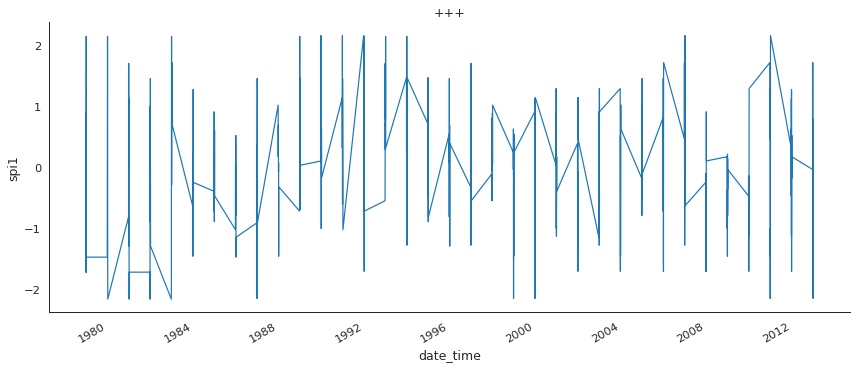

In [173]:
df1=df.loc[:,['date_time','spi1']]
df1.set_index('date_time',inplace=True)
df1.plot(figsize=(12,5))
plt.ylabel('spi1')
plt.legend().set_visible(False)
plt.tight_layout()
plt.title('+++')
sns.despine(top=True)
plt.show();

In [207]:
dataset = df.spi1.values #numpy.ndarray
dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
    
look_back = 10
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [208]:
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=50, batch_size=10, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

model.summary()

Epoch 1/50
33/33 [==============================] - 3s 21ms/step - loss: 0.1205 - val_loss: 0.0663
Epoch 2/50
33/33 [==============================] - 0s 5ms/step - loss: 0.0547 - val_loss: 0.0593
Epoch 3/50
33/33 [==============================] - 0s 5ms/step - loss: 0.0500 - val_loss: 0.0584
Epoch 4/50
33/33 [==============================] - 0s 5ms/step - loss: 0.0506 - val_loss: 0.0561
Epoch 5/50
33/33 [==============================] - 0s 6ms/step - loss: 0.0501 - val_loss: 0.0551
Epoch 6/50
33/33 [==============================] - 0s 5ms/step - loss: 0.0480 - val_loss: 0.0536
Epoch 7/50
33/33 [==============================] - 0s 6ms/step - loss: 0.0468 - val_loss: 0.0529
Epoch 8/50
33/33 [==============================] - 0s 5ms/step - loss: 0.0470 - val_loss: 0.0519
Epoch 9/50
33/33 [==============================] - 0s 5ms/step - loss: 0.0449 - val_loss: 0.0514
Epoch 10/50
33/33 [==============================] - 0s 6ms/step - loss: 0.0440 - val_loss: 0.0511
Epoch 11/50
33/33 

In [209]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])
print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

Train Mean Absolute Error: 0.6990134321661878
Train Root Mean Squared Error: 0.8719102261183724
Test Mean Absolute Error: 0.7739384257576393
Test Root Mean Squared Error: 0.9697799791225128


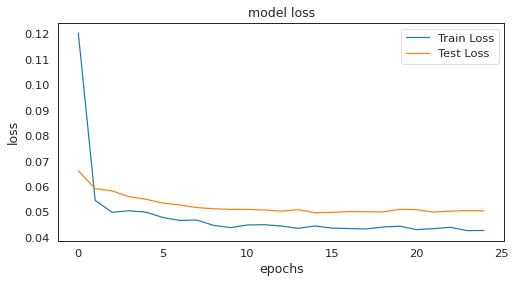

In [210]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

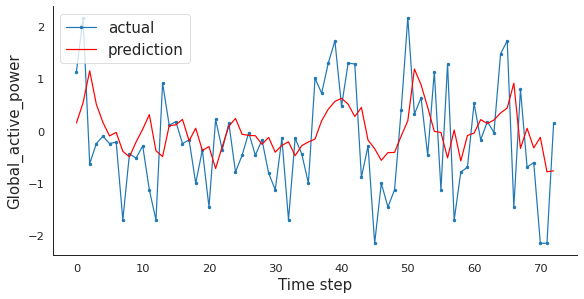

In [211]:
aa=[x for x in range(73)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:200], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:200], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();